# CS16B021
# PRIYANSH SANGULE

# Importing datasets

## LAB6 Part1: Precision Recall and ROC Curves

In [9]:
from sklearn import svm, datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs , make_circles


#Dataset variable
data = []

# Real Data
irisX , irisY = datasets.load_iris(return_X_y = True)
data.append([irisX,irisY,'Iris Dataset'])
bcX , bcY = datasets.load_breast_cancer(return_X_y=True)
data.append([bcX,bcY,'Breast Cancer Dataset'])

# Generated datsets
# 1 Moons
moonX, moonY = make_moons(n_samples=100, noise=0.1)
data.append([moonX,moonY,'Generated Moons Datasets'])
# 2 Circles
circleX, circleY = make_circles(n_samples=100, noise=0.1)
data.append([circleX,circleY,'Generated Circles Datasets'])
# 3 
LinearlySeparableX, LinearlySeparableY = make_blobs(n_samples=100,centers=2, n_features=2)
data.append([LinearlySeparableX, LinearlySeparableY,'Linearly Separated Datasets'])

## Precision Recall

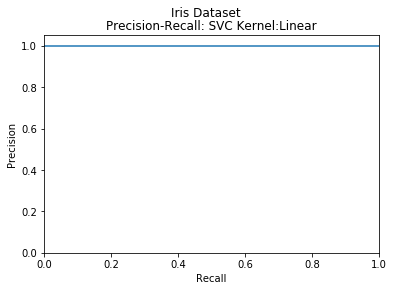

/opt/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


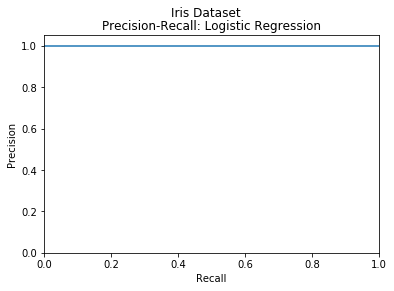

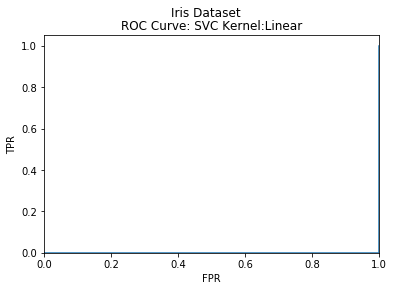

/opt/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


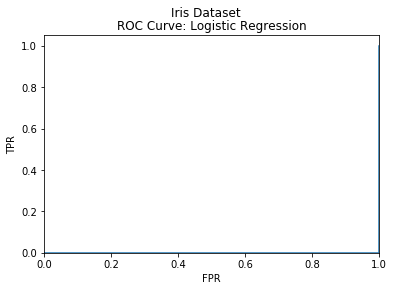

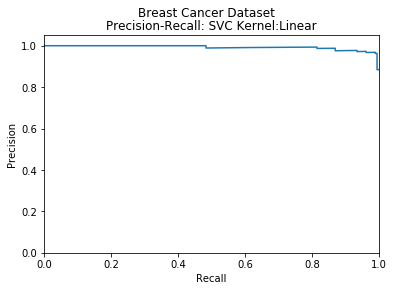

/opt/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


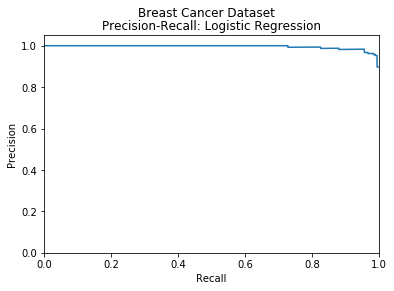

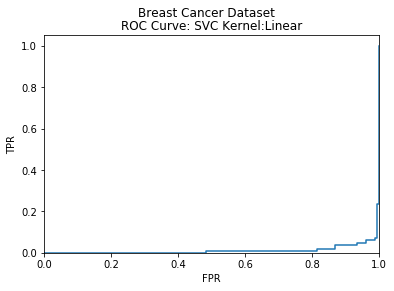

/opt/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


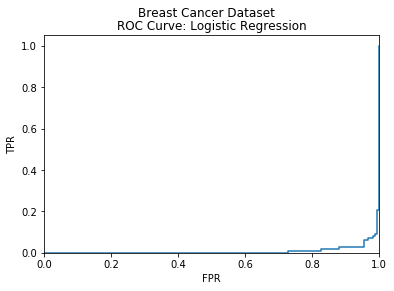

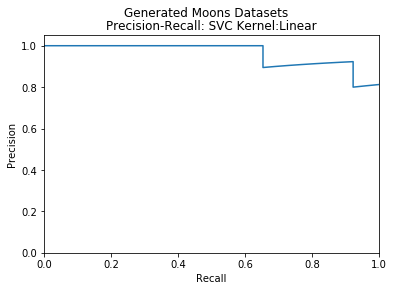

/opt/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


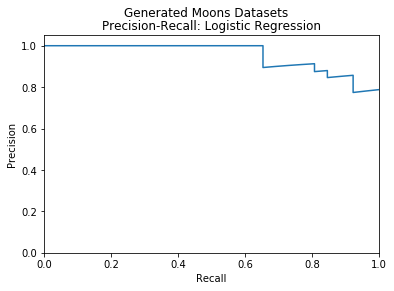

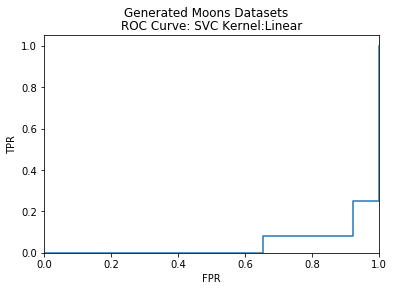

/opt/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


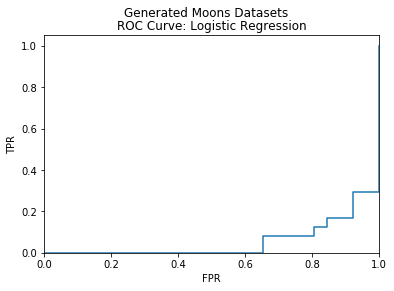

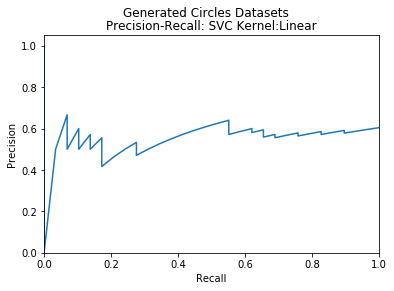

/opt/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


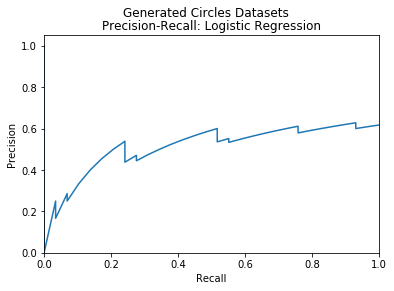

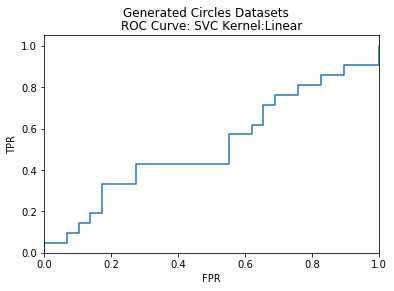

/opt/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


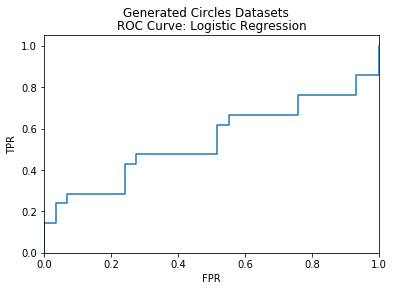

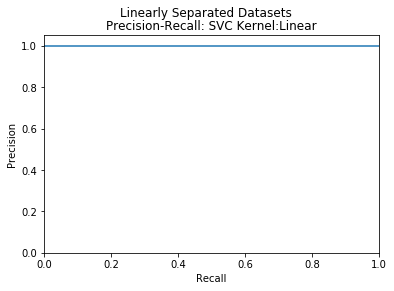

/opt/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


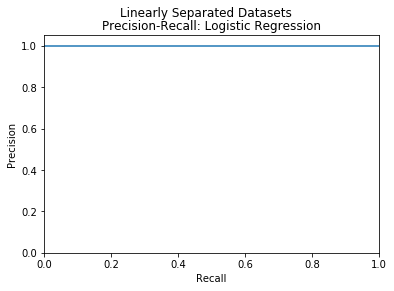

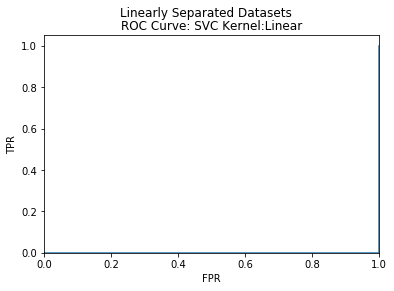

/opt/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


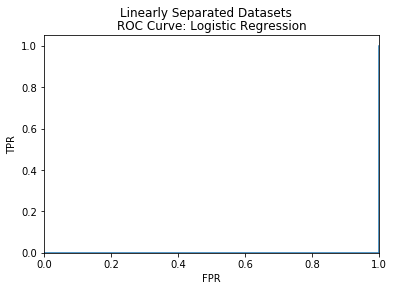

In [10]:
# Precision Recall
from sklearn.metrics import precision_recall_curve
from sklearn.utils.fixes import signature
from sklearn import linear_model 
# ROC
from sklearn.metrics import roc_curve

for i,dataset in enumerate(data):
    X = dataset[0]
    y = dataset[1]
    
# Add noisy features
#     random_state = np.random.RandomState(0)
#     n_samples, n_features = X.shape
#     X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# Limit to the two first classes, and split into training and test
    X_train, X_test, y_train, y_test = train_test_split(X[y < 2], y[y < 2], test_size=.5, random_state=0)
    
# Create a simple classifier
    # PRECISION RECALL LINEAR
    svc = svm.SVC(kernel='linear',probability=True)
    proba1 = svc.fit(X_train[:],y_train[:]).predict_proba(X_test[:])
    prec , rec, t = precision_recall_curve(y_test[:],proba1[:,1])
    plt.plot(rec,prec,label="SVM")
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall: SVC Kernel:Linear')
    plt.suptitle(dataset[2])
    plt.show()
    
    #PRECISION RECALL LOGISTIC REGRESSION
    logisticRegressor = linear_model.LogisticRegression()
    proba = logisticRegressor.fit(X_train[:],y_train[:]).predict_proba(X_test[:])
    prec1 , rec1, t1 = precision_recall_curve(y_test[:],proba[:,1])
    plt.plot(rec1,prec1,label="SVM")
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall: Logistic Regression')
    plt.suptitle(dataset[2])
    plt.show()
    
    #ROC CURVE LINEAR
    svc = svm.SVC(kernel='linear',probability=True)
    proba1 = svc.fit(X_train[:],y_train[:]).predict_proba(X_test[:])
    prec , rec, t = roc_curve(y_test[:],proba1[:,1])
    plt.plot(rec,prec,label="SVM")
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('ROC Curve: SVC Kernel:Linear')
    plt.suptitle(dataset[2])
    plt.show()
    
    #ROC CURVE LOGISTIC
    logisticRegressor = linear_model.LogisticRegression()
    proba = logisticRegressor.fit(X_train[:],y_train[:]).predict_proba(X_test[:])
    prec1 , rec1, t1 = roc_curve(y_test[:],proba[:,1])
    plt.plot(rec1,prec1,label="SVM")
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('ROC Curve: Logistic Regression')
    plt.suptitle(dataset[2])
    plt.show()
    

## Lab6-Part2: PCA and KMeans

### Generating datasets

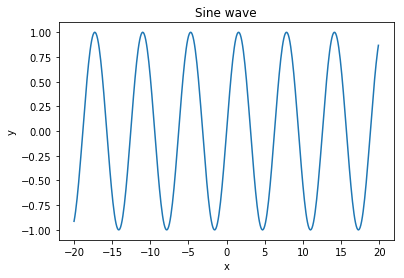

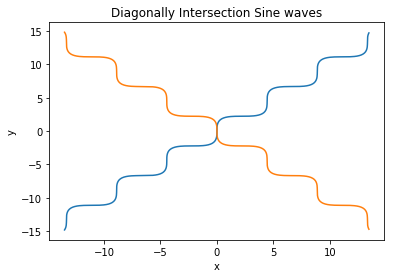

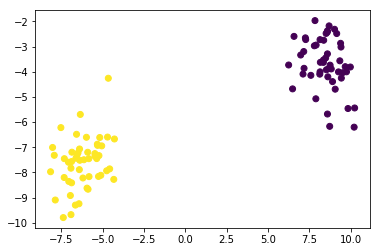

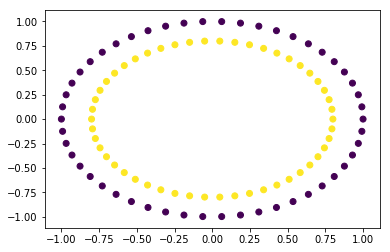

Sine Wave  PCA :
[[ 0.70710678 -0.70710678]
 [-0.70710678 -0.70710678]]


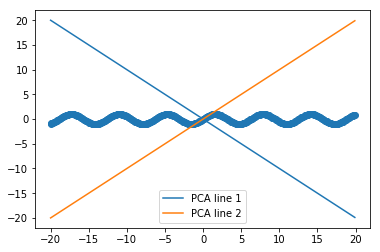

 
Sine Wave K-Means :


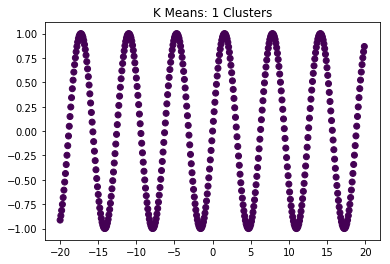

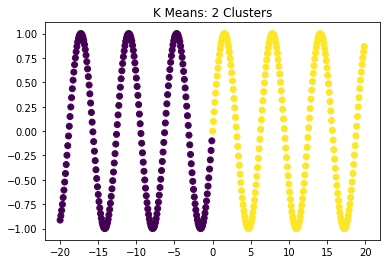

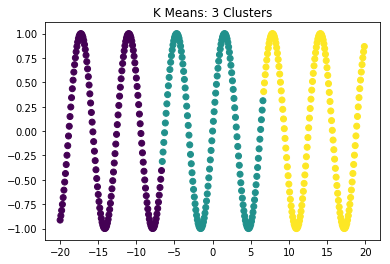

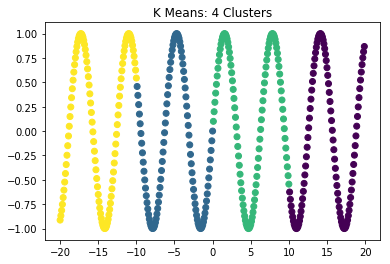

 
Diagonal Sine Waves  PCA :
[[1. 0.]
 [0. 1.]]


/opt/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:73: RuntimeWarning: divide by zero encountered in double_scalars


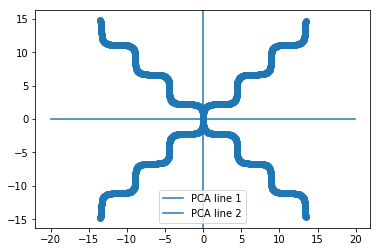

 
Diagonal Sine Waves K-Means :


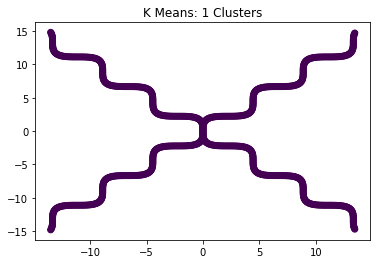

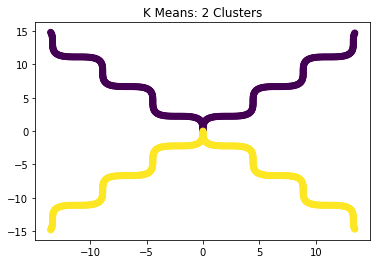

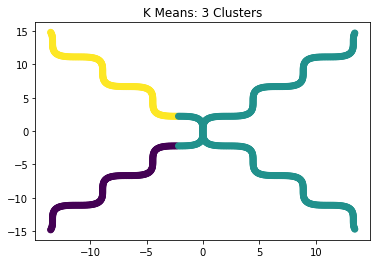

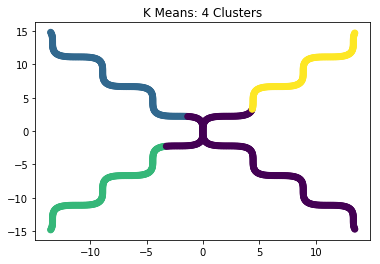

 
Blobs  PCA :
[[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]


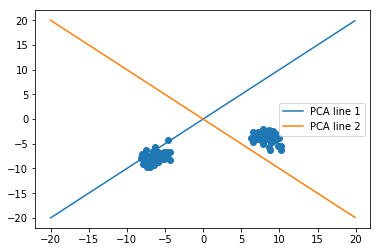

 
Blobs K-Means :


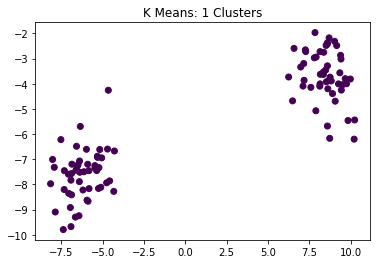

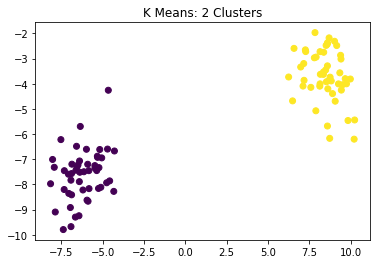

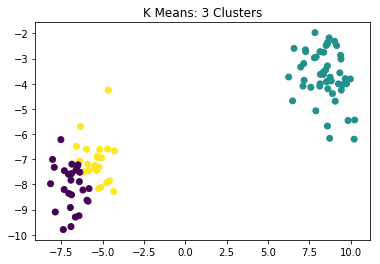

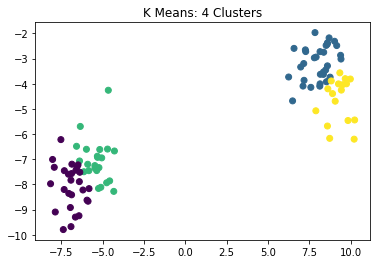

 
Circles  PCA :
[[-0. -1.]
 [ 1.  0.]]


/opt/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:71: RuntimeWarning: divide by zero encountered in double_scalars


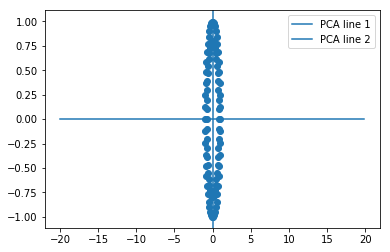

 
Circles K-Means :


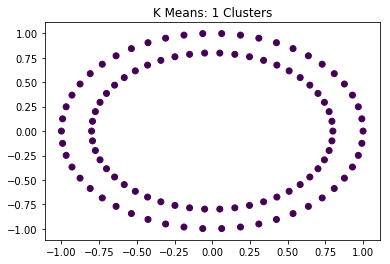

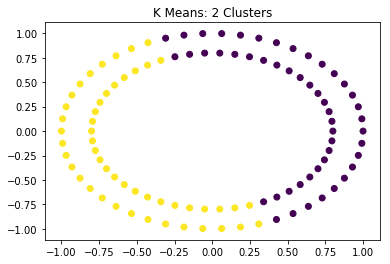

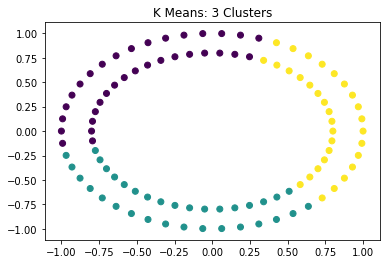

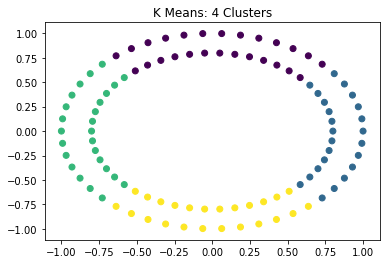

In [17]:
import numpy as np
import matplotlib.pyplot as plot

## SINE WAVE
x = np.arange(-20, 20, 0.1);
y = np.sin(x)
plot.plot(x, y)
plot.title('Sine wave')
plot.xlabel('x')
plot.ylabel('y')
plot.show()

### ROTATED SINE WAVES
## WAVE 1
sin45 = np.sin([np.pi/4])[0] 
cos45 = np.sin([np.pi/4])[0] 
x1 = x*sin45 - y*cos45
y1 = x*sin45 + y*cos45
plot.plot(x1, y1)

##Wave2
x2=x1
y2=-y1
plot.plot(x2, y2)
plot.title('Diagonally Intersection Sine waves')
plot.xlabel('x')
plot.ylabel('y')
plot.show()

##Combined dataset for both sine waves
DiagonalSinesX = np.append(x1,x2)
DiagonalSinesY = np.append(y1,y2)

#Blobs
blobXY, blobLabel = make_blobs(n_samples=100,centers=2, n_features=2)
plot.scatter(blobXY[:,0], blobXY[:,1], c=blobLabel)
plot.show()

#Make Circles
circlesXY, circlesLabel = make_circles(n_samples=100)
plot.scatter(circlesXY[:,0],circlesXY[:,1],c=circlesLabel)
plot.show()

##Combining all datasets
data = [[x,y,'Sine Wave'],[DiagonalSinesX,DiagonalSinesY,'Diagonal Sine Waves'],[blobXY[:,0],blobXY[:,1],'Blobs'],[circlesXY[:,0],circlesXY[:,1],'Circles']]

#Creating dataframes for all datasets
import pandas as pd
data1 = []
for i in range(len(data)):
    datasetXY = data[i]
    X = pd.Series(datasetXY[0])
    Y = pd.Series(datasetXY[1])
    dataframe = pd.DataFrame({ 'X': X, 'Y': Y })
    data1.append(dataframe)
    
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans

#Implementing PCA and K Means on all datas
for j,dataset in enumerate(data1):
    #PCA
    print(data[j][2], " PCA :")
    pca = PCA(n_components=2)
    pca.fit(scale(dataset))
    print(pca.components_)
    
    ##plot PCA
    pcaX = np.arange(-20, 20, 0.1);
    m1 = pca.components_[0][1]/pca.components_[0][0]
    pcaY = (m1)*pcaX
    m2 = pca.components_[1][1]/pca.components_[1][0]
    pcaY2 = (m2)*pcaX
    
    plot.scatter(data[j][0],data[j][1])
    if(pca.components_[0][0]==0):
        plt.axvline(label='PCA line 1')
    else:
        plot.plot(pcaX, pcaY,label='PCA line 1')
    if(pca.components_[1][0]==0):
        plt.axvline(label='PCA line 2')
    else:
        plot.plot(pcaX, pcaY2,label='PCA line 2')
    plot.legend()
    plot.show()
    
    ##K Means
    print(" ")
    print(data[j][2], "K-Means :")
    
    for k in range (1 ,5):
        y_pred = KMeans(n_clusters=k, random_state=1).fit_predict(dataset[:])
        plt.scatter(dataset['X'], dataset['Y'], c=y_pred)
        plt.title("K Means: "+ str(k) + " Clusters")
        plt.show()
    print(" ")